In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.metadata.tables # Check tables, not much useful
Base.classes.keys() # Get the table names

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent = session.query(Measurement).order_by(Measurement.date.desc()).first()
recent.date

'2017-08-23'

Year date 2016-08-23


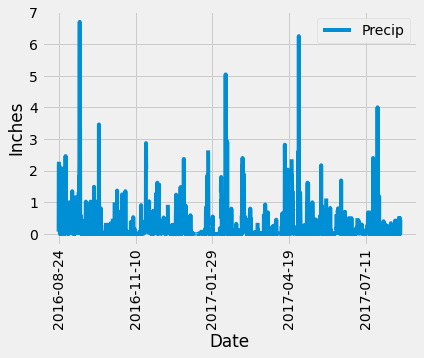

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_date=dt.date(2017,8,23)-dt.timedelta(days=365)
print('Year date {}'.format(year_date))
# Perform a query to retrieve the data and precipitation scores
scores=session.query(Measurement.date,
                     Measurement.prcp).filter(Measurement.date>year_date).\
order_by(Measurement.date).all()
scores

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(scores, columns= ["Date", 'Precip'])

precip_df.sort_values(by = 'Date')

# Sort the dataframe by date

precip_df.set_index("Date", inplace = True)

precip_df.fillna(0.0)

# Use Pandas Plotting with Matplotlib to plot the data

precip_df.reset_index().sort_values(by = 'Date', ascending = True).plot(x = 'Date', y = 'Precip', rot = 90)
plt.xlabel('Date')
plt.ylabel('Inches')

plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precip
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station,func.count(Measurement.id)]
acti_stations = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
acti_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
mostact= session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
mostact

(54.0, 85.0, 71.66378066378067)

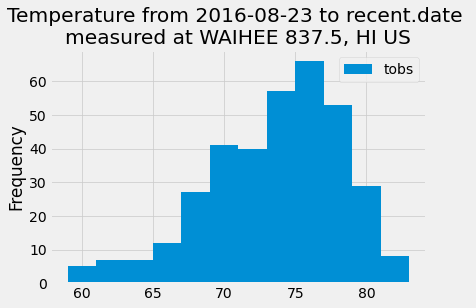

In [24]:
queryresult = session.query(Measurement.tobs).\
    filter(Measurement.station == acti_stations[0][0]).\
    filter(Measurement.date >= year_date).all()
temperatures = list(np.ravel(queryresult))

sel = [Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
queryresult = session.query(*sel).all()
stations_desc = pd.DataFrame(queryresult, columns=['Station','Name','Latitude','Longitude','Elevation'])

stationname = stations_desc.loc[stations_desc["Station"] == acti_stations[0][0],"Name"].tolist()[0]

# n, bins, patches = plt.hist(temperatures, bins=12,alpha=0.7, rwidth=1.0,label='tobs')
plt.hist(temperatures, bins=12,rwidth=1.0,label='tobs')
plt.grid(axis='both', alpha=0.75)
plt.ylabel('Frequency')
plt.title(f"Temperature from {year_date} to recent.date \nmeasured at {stationname}")
plt.legend()
# maxfreq = n.m

# Close session

In [16]:
# Close Session
session.close()